In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import glob as glob
import seaborn as sns
import os.path

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
cd 'drive/My Drive/AI와 기후변화 20231025'

[Errno 2] No such file or directory: 'drive/My Drive/AI와 기후변화 20231025'
/content/drive/My Drive/AI와 기후변화 20231025


In [35]:
df = pd.read_csv('./data/asos058_SQM_ACCESS-CM2_ssp585.csv')
df

,YR,MM,DD,PCP,TMAX,TMIN,WDSP,RLTV_HMDT,SLRD
0,2011,1,1,0.0,-0.635267,-10.268472,6.269865,0.518354,-99
1,2011,1,2,0.0,-5.006274,-13.382435,3.414372,0.732206,-99
2,2011,1,3,0.0,-3.341579,-12.944737,0.000000,0.568830,-99
3,2011,1,4,0.0,-0.500000,-7.120123,0.000000,0.770886,-99
4,2011,1,5,0.0,3.398970,-8.702872,2.000000,0.750000,-99
...,...,...,...,...,...,...,...,...,...
32867,2100,12,27,0.0,4.206941,-2.883553,1.895584,0.563366,-99
32868,2100,12,28,0.0,5.915610,-2.331283,1.500000,0.641709,-99
32869,2100,12,29,0.0,7.088260,-3.215477,4.915481,0.467763,-99
32870,2100,12,30,0.0,2.477641,-3.763069,1.000000,0.606926,-99


In [36]:
PARAMETER = 'PCP'

In [37]:
#datetime 컬럼 생성 후 월단위 데이터 집계
df['date']=pd.to_datetime(df.YR.astype(str)+'-'+df.MM.astype(str)+'-'+df.DD.astype(str))
YearList=df.YR.unique()
df.drop(['YR','MM','DD'],axis=1,inplace=True)
aggr=df.groupby(pd.Grouper(key='date',freq='1M')).mean()


In [38]:
# 월간 지표를 연간 / 월별로 재배열
df=pd.DataFrame(aggr[[PARAMETER]].to_numpy().reshape(90,12)).T
df.columns=YearList
df.index=range(1,13)
df1=df[df.columns[:30]]
df2=df[df.columns[30:60]]
df3=df[df.columns[60:]]

Text(0.5, 54.249999999999986, 'Year')

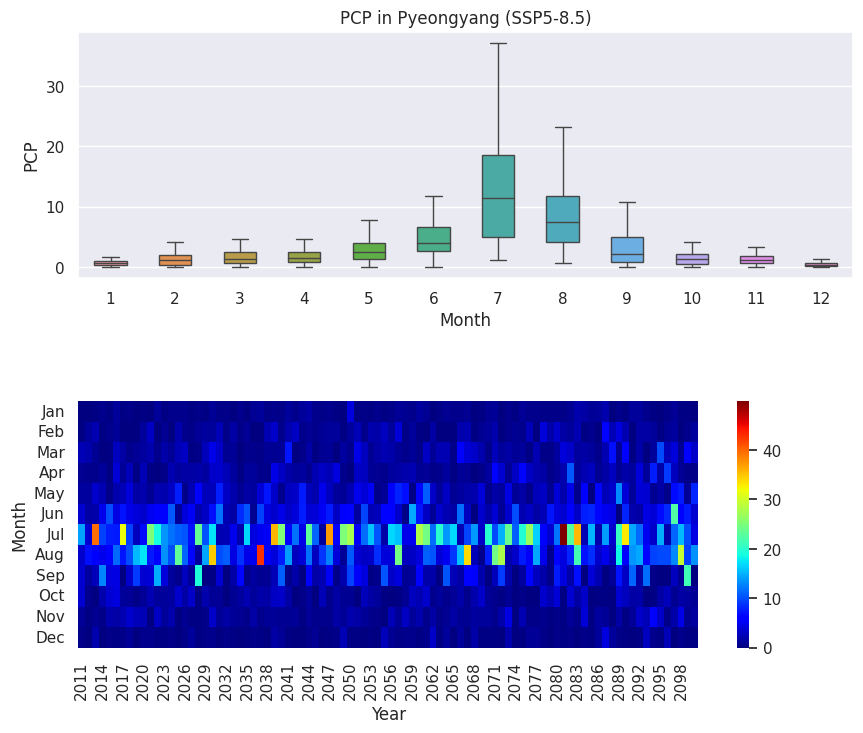

In [39]:
# seaborn을 이용한 시각화, 2개의 subplot 생성
fig, ax = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.5)
ax[0].set_title(f'{PARAMETER} in Pyeongyang (SSP5-8.5)')
sns.set(rc={'figure.figsize':(10,8)})

# 월간 지표를 boxplot으로 표현
ax_1=sns.boxplot(data=df.T,width=0.5,linewidth=1,showfliers=False,ax=ax[0])
ax_1.set_xlabel('Month')
ax_1.set_ylabel(PARAMETER)

# 연간 월 지표를 heatmap으로 표현
ax_2=sns.heatmap(df,cmap='jet',ax=ax[1],yticklabels=True)
ax_2.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
ax_2.set_ylabel('Month')
ax_2.set_xlabel('Year')

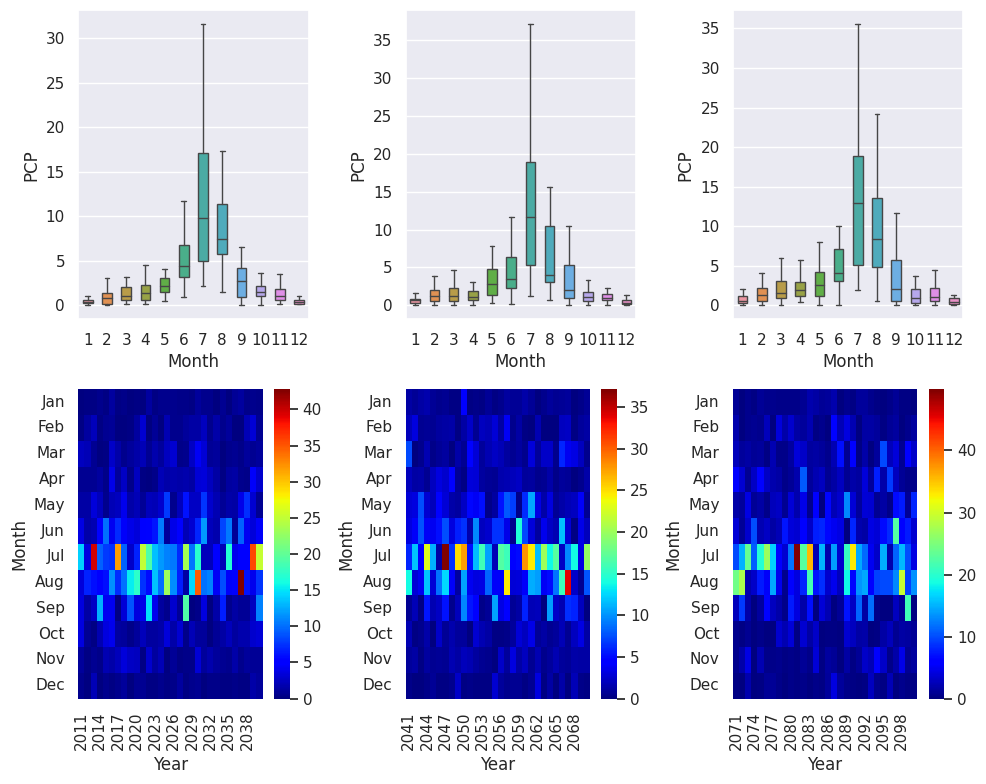

In [40]:
# seaborn을 이용한 시각화, 2개의 subplot 생성, future 1,2,3
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5)
#ax.set_title(f'{PARAMETER} in Pyeongyang (SSP5-8.5)')
sns.set(rc={'figure.figsize':(10,8)})

# 월간 지표를 boxplot으로 표현
ax1=sns.boxplot(data=df1.T,width=0.5,linewidth=1,showfliers=False,ax=ax[0,0])
ax1.set_xlabel('Month')
ax1.set_ylabel(PARAMETER)
# 연간 월 지표를 heatmap으로 표현
ax2=sns.heatmap(df1,cmap='jet',ax=ax[1,0],yticklabels=True)
ax2.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
ax2.set_ylabel('Month')
ax2.set_xlabel('Year')

# 월간 지표를 boxplot으로 표현
ax3=sns.boxplot(data=df2.T,width=0.5,linewidth=1,showfliers=False,ax=ax[0,1])
ax3.set_xlabel('Month')
ax3.set_ylabel(PARAMETER)
# 연간 월 지표를 heatmap으로 표현
ax4=sns.heatmap(df2,cmap='jet',ax=ax[1,1],yticklabels=True)
ax4.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
ax4.set_ylabel('Month')
ax4.set_xlabel('Year')

# 월간 지표를 boxplot으로 표현
ax5=sns.boxplot(data=df3.T,width=0.5,linewidth=1,showfliers=False,ax=ax[0,2])
ax5.set_xlabel('Month')
ax5.set_ylabel(PARAMETER)
# 연간 월 지표를 heatmap으로 표현
ax6=sns.heatmap(df3,cmap='jet',ax=ax[1,2],yticklabels=True)
ax6.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
ax6.set_ylabel('Month')
ax6.set_xlabel('Year')

fig.tight_layout()